Note: you may need to restart the kernel to use updated packages.
Title: MITCH HEDBERG: COMEDY CENTRAL SPECIAL (1999) – Full Transcript
Innovation Rate: 24.37%
----------------------------------------
Title: DAVE CHAPPELLE: FOR WHAT IT’S WORTH (2004) – Full Transcript
Innovation Rate: 18.43%
----------------------------------------
Title: EDDIE MURPHY: DELIRIOUS (1983) – Full Transcript
Innovation Rate: 16.63%
----------------------------------------
Title: GABRIEL IGLESIAS: HOT AND FLUFFY (2007) – Full Transcript
Innovation Rate: 15.46%
----------------------------------------
Title: DAVE CHAPPELLE: KILLIN THEM SOFTLY (2000) – Full Transcript
Innovation Rate: 17.41%
----------------------------------------
Title: RICHARD PRYOR: LIVE ON THE SUNSET STRIP (1982) – Full Transcript
Innovation Rate: 15.65%
----------------------------------------
Title: JERRY SEINFELD: I’M TELLING YOU FOR THE LAST TIME (1998) – Full Transcript
Innovation Rate: 18.88%
----------------------------------------

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/robinwoodfamily/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/robinwoodfamily/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


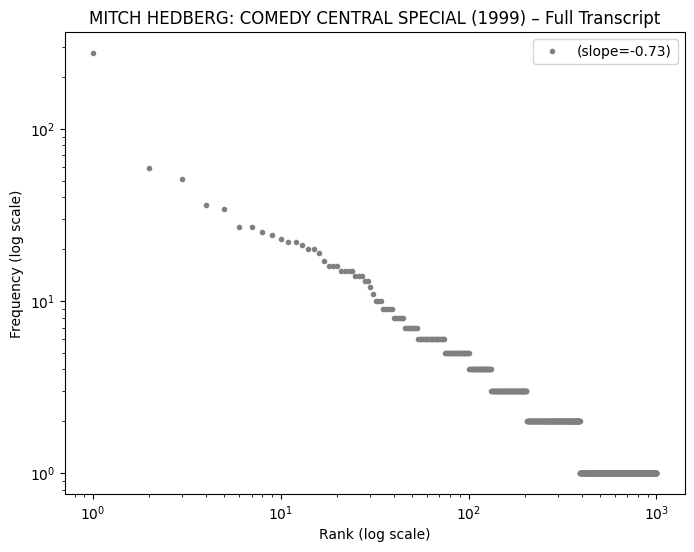

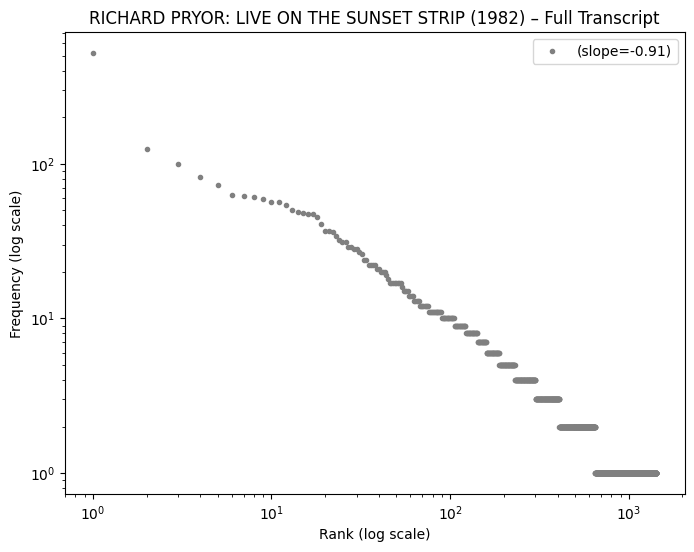

In [31]:
%pip install scipy
import pandas as pd
import requests
import json
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk import download
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

download('punkt')
download('stopwords')

url = "https://raw.githubusercontent.com/marobinette/pocs/main/project/comedy_data.txt"

response = requests.get(url)
data = response.text.strip().splitlines()
comedy_data = [json.loads(line) for line in data]
df = pd.DataFrame(comedy_data, columns=['title', 'transcript'])
pd.set_option('display.max_colwidth', None)

def export_comedian_word_data(word_data, comedian):
    """
    Exports the word data for a specific comedian to a CSV file.
    
    Parameters:
    - word_data (DataFrame): DataFrame containing words, counts, total unique words, and probabilities.
    - comedian (str): Name of the comedian to label the CSV file.
    """
    word_data = word_data.rename(columns={'word': 'types'})
    word_data = word_data[['types', 'counts', 'total_unique', 'probs']]    
    filename = f"{comedian}.csv"
    word_data.to_csv(filename, index=False)
    print(f"Data exported to {filename} successfully.")

def get_word_data(words):
    """
    Generates word frequency data including counts and probabilities.
    
    Parameters:
    - words (list): List of words to analyze for frequency and probability.
    
    Returns:
    - DataFrame: DataFrame with word counts, probabilities, and total unique word count.
    """
    word_data = pd.Series(words).value_counts().reset_index()
    word_data.columns = ['word', 'counts']        
    word_data['probs'] = word_data['counts'] / word_data['counts'].sum()    
    word_data['total_unique'] = len(word_data)
    word_data = word_data.sort_values(by='counts', ascending=False).reset_index(drop=True)
    
    return word_data

def tokenize_words(text, remove_stop_wprds = False):
    """
    Tokenizes the text into words, with an option to remove stopwords.
    
    Parameters:
    - text (str or list): Text or list of strings to tokenize.
    - remove_stop_wprds (bool): Whether to remove stopwords from the tokens.
    
    Returns:
    - list: List of tokenized words.
    """
    if isinstance(text, list):
        text = ' '.join(text)
    
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)  

    if remove_stop_wprds:
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
    
    return words

def calculate_innovation_rate(words):
    """
    Calculates the innovation rate as the ratio of unique words to the total words.
    
    Parameters:
    - words (list): List of tokenized words.
    
    Returns:
    - float: Innovation rate.
    """
    unique_words = set(words)
    total_words = len(words)
    innovation_rate = len(unique_words) / total_words if total_words > 0 else 0
    return innovation_rate

def print_innovation_rate_data(df):
    for idx, row in df.iterrows():
        title = row['title']
        transcript = row['transcript']
        
        # Tokenize the transcript
        words = tokenize_words(transcript, remove_stop_wprds=False)
        
        # Calculate the innovation rate
        innovation_rate = calculate_innovation_rate(words) * 100  # Convert to percentage
    
        # Print the title and innovation rate
        print(f"Title: {title}")
        print(f"Innovation Rate: {innovation_rate:.2f}%")
        print("-" * 40)

def plot_zipf_distribution(df, title):
    """
    Plots the Zipf distribution for the given comedian's transcript.
    
    Parameters:
    - df (DataFrame): DataFrame containing comedy data with titles and transcripts.
    - title (str): The comedian's name for which to plot the distribution.
    """
    # Filter the dataframe for the given comedian
    transcript = df[df['title'] == title]['transcript'].values[0]
    
    # Tokenize the words
    words = tokenize_words(transcript, remove_stop_wprds=True)
    
    # Generate word frequency data
    word_data = get_word_data(words)
    
    # Rank the words by frequency
    word_data['rank'] = np.arange(1, len(word_data) + 1)
    
    # Log-transform rank and frequency
    log_rank = np.log10(word_data['rank'])
    log_freq = np.log10(word_data['counts'])
    
    # Perform linear regression to calculate the slope
    slope, intercept, r_value, p_value, std_err = linregress(log_rank, log_freq)
    
    # Plot the Zipf distribution (log-log scale)
    plt.figure(figsize=(8, 6))
    plt.loglog(word_data['rank'], word_data['counts'], marker=".", linestyle='none', color="grey", label=f'(slope={slope:.2f})')
    
    plt.xlabel('Rank (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.title(title)
    plt.legend()
    plt.show()


print_innovation_rate_data(df)
plot_zipf_distribution(df, 'MITCH HEDBERG: COMEDY CENTRAL SPECIAL (1999) – Full Transcript') 
plot_zipf_distribution(df, 'RICHARD PRYOR: LIVE ON THE SUNSET STRIP (1982) – Full Transcript') 